In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv("dataset/train.csv")
print("Train Dataset:")
print(train_df.head())


#check suraj


Train Dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilizat

/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/3951081823.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("dataset/train.csv")


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
train_df = train_df.drop(["ID", "Name", "SSN", "Customer_ID","Month"], axis=1)

In [8]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Data cleaning

In [9]:
train_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
column_description = train_df["Monthly_Balance"].describe()
print(column_description)

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object


In [11]:
import numpy as np

# Convert 'Monthly_Balance' to numeric, forcing errors to NaN
train_df["Monthly_Balance"] = pd.to_numeric(
    train_df["Monthly_Balance"], errors="coerce"
)

train_df["Monthly_Balance"].fillna(train_df["Monthly_Balance"].mean(), inplace=True)

# Verify that the column is cleaned
print(train_df["Monthly_Balance"].describe())

count    100000.000000
mean        402.551258
std         212.628374
min           0.007760
25%         270.913865
50%         338.672152
75%         467.670597
max        1602.040519
Name: Monthly_Balance, dtype: float64


/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/506373918.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Monthly_Balance"].fillna(train_df["Monthly_Balance"].mean(), inplace=True)


In [12]:
# replace "____" in occupation column to "Other"
train_df["Occupation"].replace("_______", "Other", inplace=True)
# train_df["Occupation"] = train_df["Occupation"].replace("Other")

train_df["Occupation"].value_counts()

/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/1947382136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Occupation"].replace("_______", "Other", inplace=True)


Occupation
Other            7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [13]:
train_df['Num_of_Loan'] = train_df['Num_of_Loan'].apply(lambda x: str(str(x).replace("_","")))
train_df['Num_of_Loan'] = train_df['Num_of_Loan'].apply(lambda x: abs(float(x)))

In [14]:
# filling not specified instead of na
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna('Not Specified')
def clean_loan_types(loan_list):
    unique_loans = list(set([loan.strip() for loan in loan_list.split(',')]))
    
    if 'Not Specified' in unique_loans and len(unique_loans) > 1:
        unique_loans.remove('Not Specified')
    
    return ', '.join(unique_loans)

train_df['Type_of_Loan'] = train_df['Type_of_Loan'].apply(clean_loan_types)
print(train_df["Type_of_Loan"].describe())


count            100000
unique             2455
top       Not Specified
freq              11408
Name: Type_of_Loan, dtype: object


In [15]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].fillna("0")
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("_", ""))
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors='coerce')
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].fillna(0)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(int)


In [16]:
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].apply(lambda x: str(x).replace("_", "0"))
train_df['Changed_Credit_Limit'] = pd.to_numeric(train_df['Changed_Credit_Limit'], errors='coerce')
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(train_df['Changed_Credit_Limit'].median())


In [17]:
train_df['Age'] = train_df['Age'].apply(lambda x: str(x).replace("_", ""))
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())


print(train_df['Age'].describe())

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64


In [18]:
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(
    lambda x: (int(x.split(' ')[0]) * 12 + int(x.split(' ')[3])) if pd.notnull(x) else None
).astype(float)

# Fill missing values with the median
median_value = train_df['Credit_History_Age'].median()
train_df['Credit_History_Age'].fillna(median_value, inplace=True)

# describe the cleaned column
print(train_df["Credit_History_Age"].describe())


count    100000.000000
mean        220.997160
std          95.133546
min           1.000000
25%         154.000000
50%         219.000000
75%         292.000000
max         404.000000
Name: Credit_History_Age, dtype: float64


/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/3896358569.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Credit_History_Age'].fillna(median_value, inplace=True)


In [19]:
# describe the credit utilization ratio column
print(train_df["Credit_Utilization_Ratio"].describe())

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


In [20]:
train_df["Outstanding_Debt"] = train_df["Outstanding_Debt"].apply(
    lambda x: str(x).replace("_", "")
)
train_df["Outstanding_Debt"] = train_df["Outstanding_Debt"].astype(float)
column_description = train_df["Outstanding_Debt"].describe()

print(column_description)

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64


In [21]:
# cleaning credit mix with entries "_" or "" to "Other"
train_df["Credit_Mix"].replace("_", "Other", inplace=True)
train_df["Credit_Mix"].replace("", "Other", inplace=True)

# describe the 'Credit_Mix' column
column_description = train_df["Credit_Mix"].describe()
print(column_description)

count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object


/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/2643106773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Credit_Mix"].replace("_", "Other", inplace=True)
/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/2643106773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [22]:
# Convert 'Num_Credit_Inquiries' to numeric, forcing errors to NaN
train_df["Num_Credit_Inquiries"] = pd.to_numeric(
    train_df["Num_Credit_Inquiries"], errors="coerce"
)


# Handle NaN values (e.g., fill NaN with the 0)
train_df["Num_Credit_Inquiries"].fillna(
    0, inplace=True
)

# Verify that the 'Num_Credit_Inquiries' column is cleaned
print(train_df["Num_Credit_Inquiries"].describe())

count    100000.000000
mean         27.208880
std         191.308723
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64


/var/folders/g0/g5qr_lwn28d7m35_7c1ksm300000gn/T/ipykernel_30783/834996259.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Num_Credit_Inquiries"].fillna(


In [23]:
train_df["Annual_Income"] = train_df["Annual_Income"].str.rstrip("_")
train_df["Annual_Income"] = train_df["Annual_Income"].astype(float)


# Verify the changes
column_description = train_df["Annual_Income"].describe()
column_description

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [24]:
train_df["Monthly_Inhand_Salary"] = train_df["Monthly_Inhand_Salary"].fillna(
    train_df["Annual_Income"] / 12
)
column_description = train_df["Monthly_Inhand_Salary"].describe()
column_description

count    1.000000e+05
mean     5.743259e+03
std      4.581469e+04
min      3.036454e+02
25%      1.625793e+03
50%      3.101372e+03
75%      5.971780e+03
max      1.990380e+06
Name: Monthly_Inhand_Salary, dtype: float64

In [25]:
train_df.Payment_Behaviour.value_counts()

# Replace the special string with NaN in the 'Payment_Behaviour' column
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', pd.NA)

# Calculate the mode of 'Payment_Behaviour' column and fill missing values
most_frequent_value = train_df['Payment_Behaviour'].mode()[0]
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].fillna(most_frequent_value)
print(most_frequent_value)

train_df.Payment_Behaviour.value_counts()



Low_spent_Small_value_payments


Payment_Behaviour
Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [26]:
train_df.Payment_of_Min_Amount.value_counts()
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].apply(lambda val: "No" if val in ["NM", ""] else val)

train_df.Payment_of_Min_Amount.value_counts()



Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

In [27]:
train_df.Amount_invested_monthly.value_counts()

# Replace invalid or missing entries in 'Amount_invested_monthly' with NaN
train_df['Amount_invested_monthly'] = train_df['Amount_invested_monthly'].apply(lambda val: np.nan if val in ["__10000__", ""] else float(val))

# Calculate the mean of the 'Amount_invested_monthly' column
avg_investment = train_df['Amount_invested_monthly'].mean()

train_df['Amount_invested_monthly'] = train_df['Amount_invested_monthly'].fillna(value=avg_investment)

# Check if any null values remain in the column
remaining_nulls = train_df['Amount_invested_monthly'].isnull().sum()
print(f"Remaining null values: {remaining_nulls}")
print(avg_investment)

train_df.Amount_invested_monthly.value_counts()

Remaining null values: 0
195.5394560265526


Amount_invested_monthly
195.539456    8784
0.000000       169
80.415295        1
36.662351        1
89.738489        1
              ... 
36.541909        1
93.451163        1
140.809722       1
38.739377        1
167.163865       1
Name: count, Length: 91049, dtype: int64

In [28]:
train_df.Total_EMI_per_month.value_counts()

train_df.Total_EMI_per_month.isna().sum()

train_df[train_df['Total_EMI_per_month'] < 0]['Total_EMI_per_month'].count() 

0

EDA of data

<Axes: xlabel='Credit_Score', ylabel='count'>

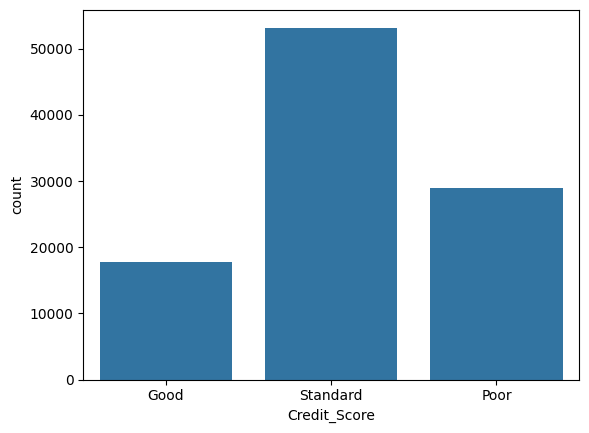

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Credit_Score", data=train_df)

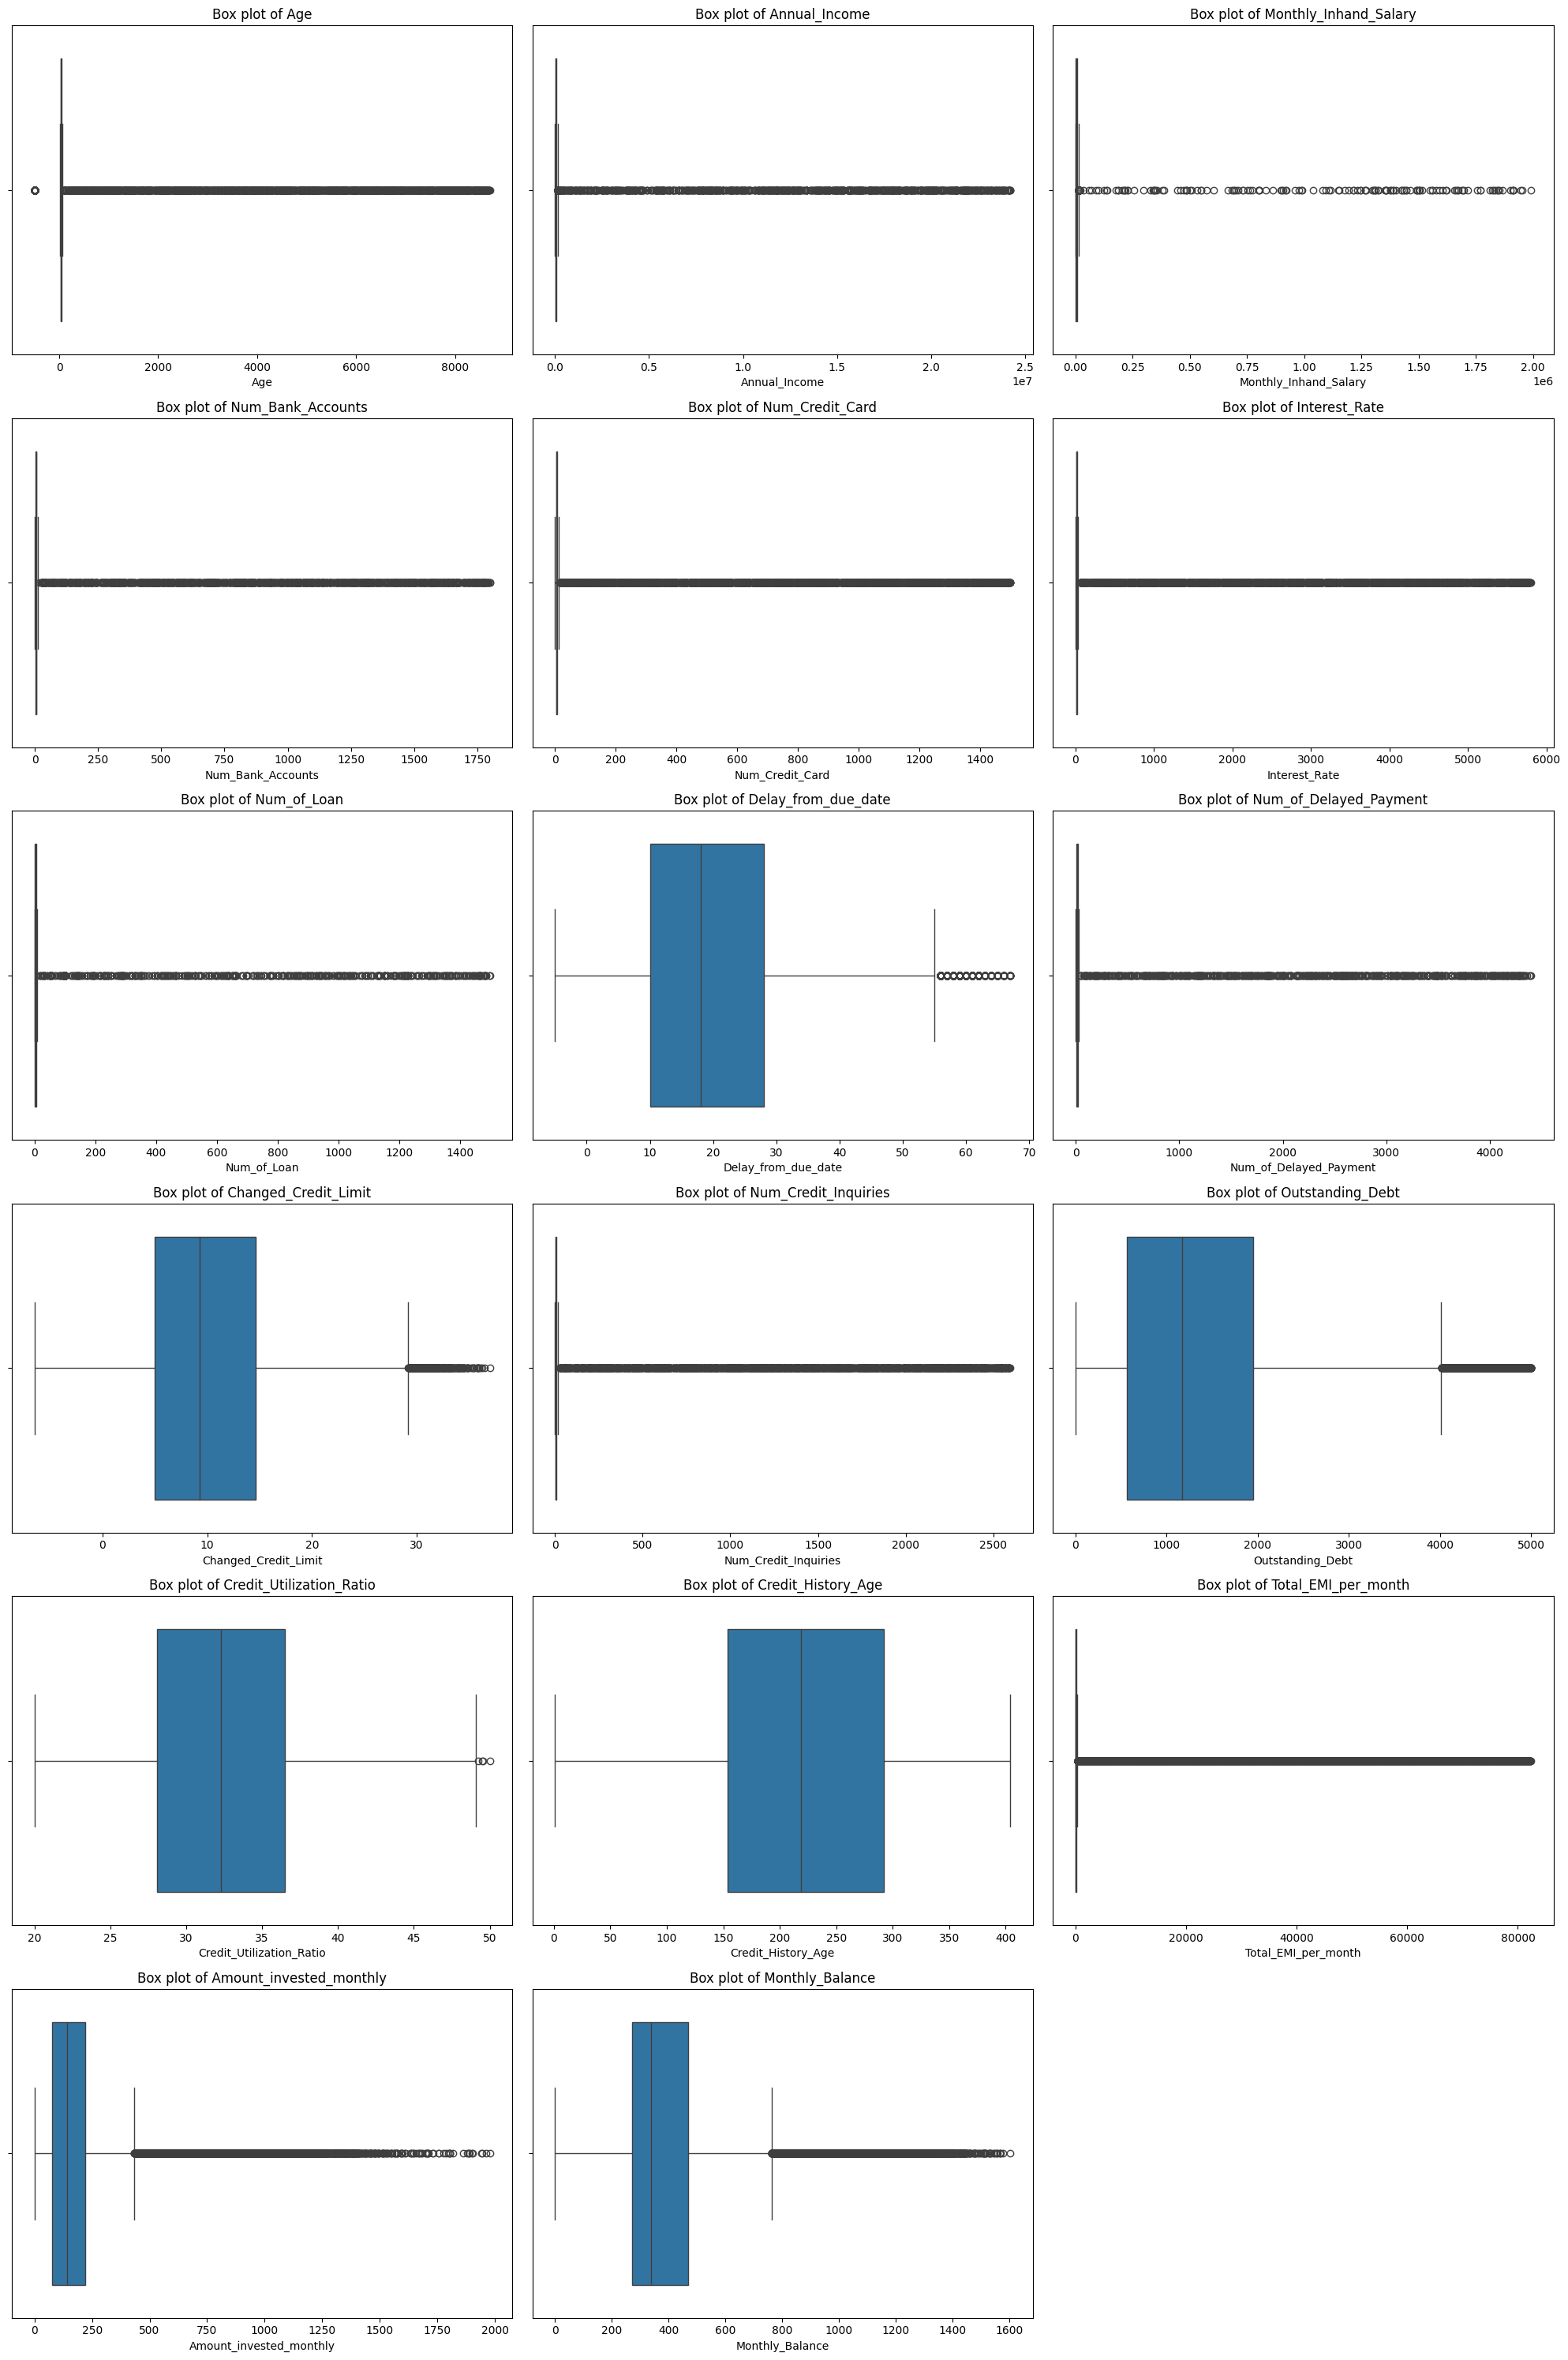

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_df is already defined
# Select all numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f"Box plot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [31]:
#remove outliars from all numeric columns
for column in numeric_columns:
    upper_limit = train_df[column].quantile(0.99)
    train_df[column] = train_df[column].clip(upper=upper_limit)

In [32]:
# removing huge outliars
train_df = train_df[(train_df["Age"] <= 75) & (train_df["Age"] >= 0)]
train_df = train_df[(train_df["Interest_Rate"] < 116)]
train_df=train_df[(train_df['Num_Bank_Accounts'] >0) & (train_df['Num_Bank_Accounts'] < 190)]
train_df = train_df[(train_df["Num_of_Loan"] < 100)]
train_df = train_df[(train_df["Num_of_Delayed_Payment"] < 40)]
train_df = train_df[(train_df["Outstanding_Debt"] < 4100)]

train_df = train_df[
    (train_df["Changed_Credit_Limit"] <= 30)
]  
train_df = train_df[(train_df["Total_EMI_per_month"] <= 10000)]  


train_df = train_df[(train_df["Num_Credit_Inquiries"] < 81)]
train_df = train_df[(train_df["Num_Credit_Card"] < 100)]

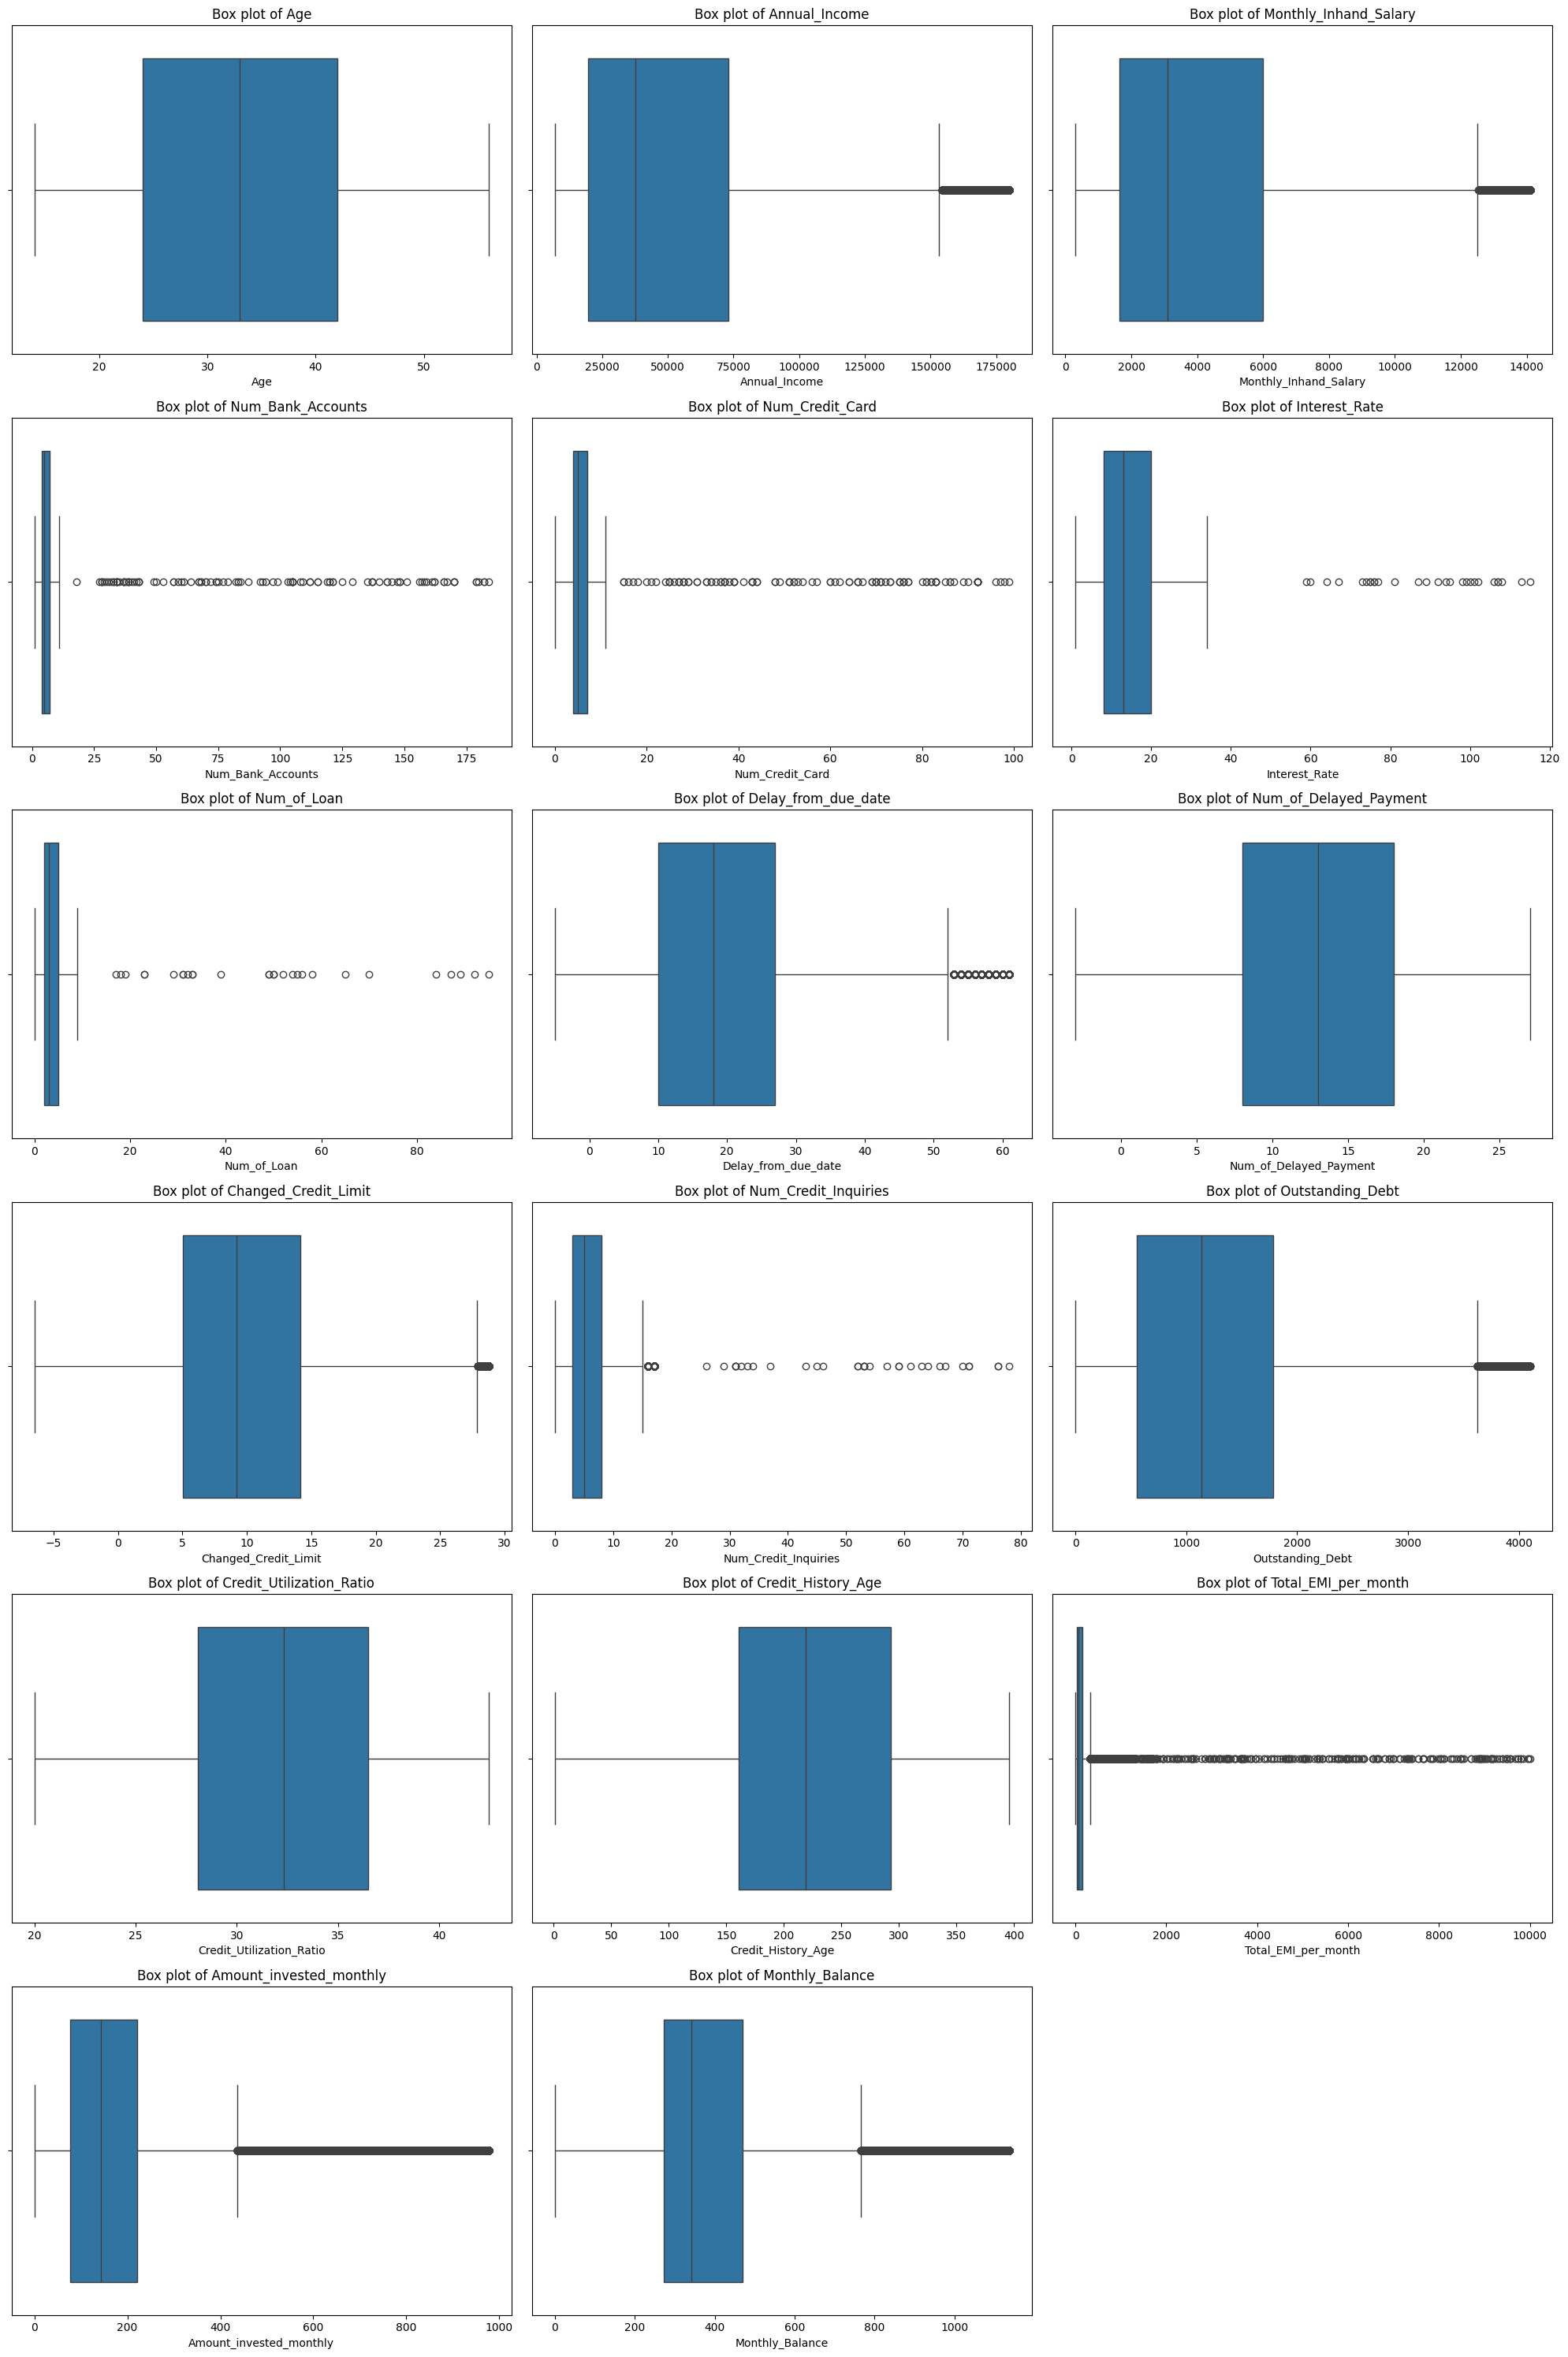

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_df is already defined
# Select all numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f"Box plot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

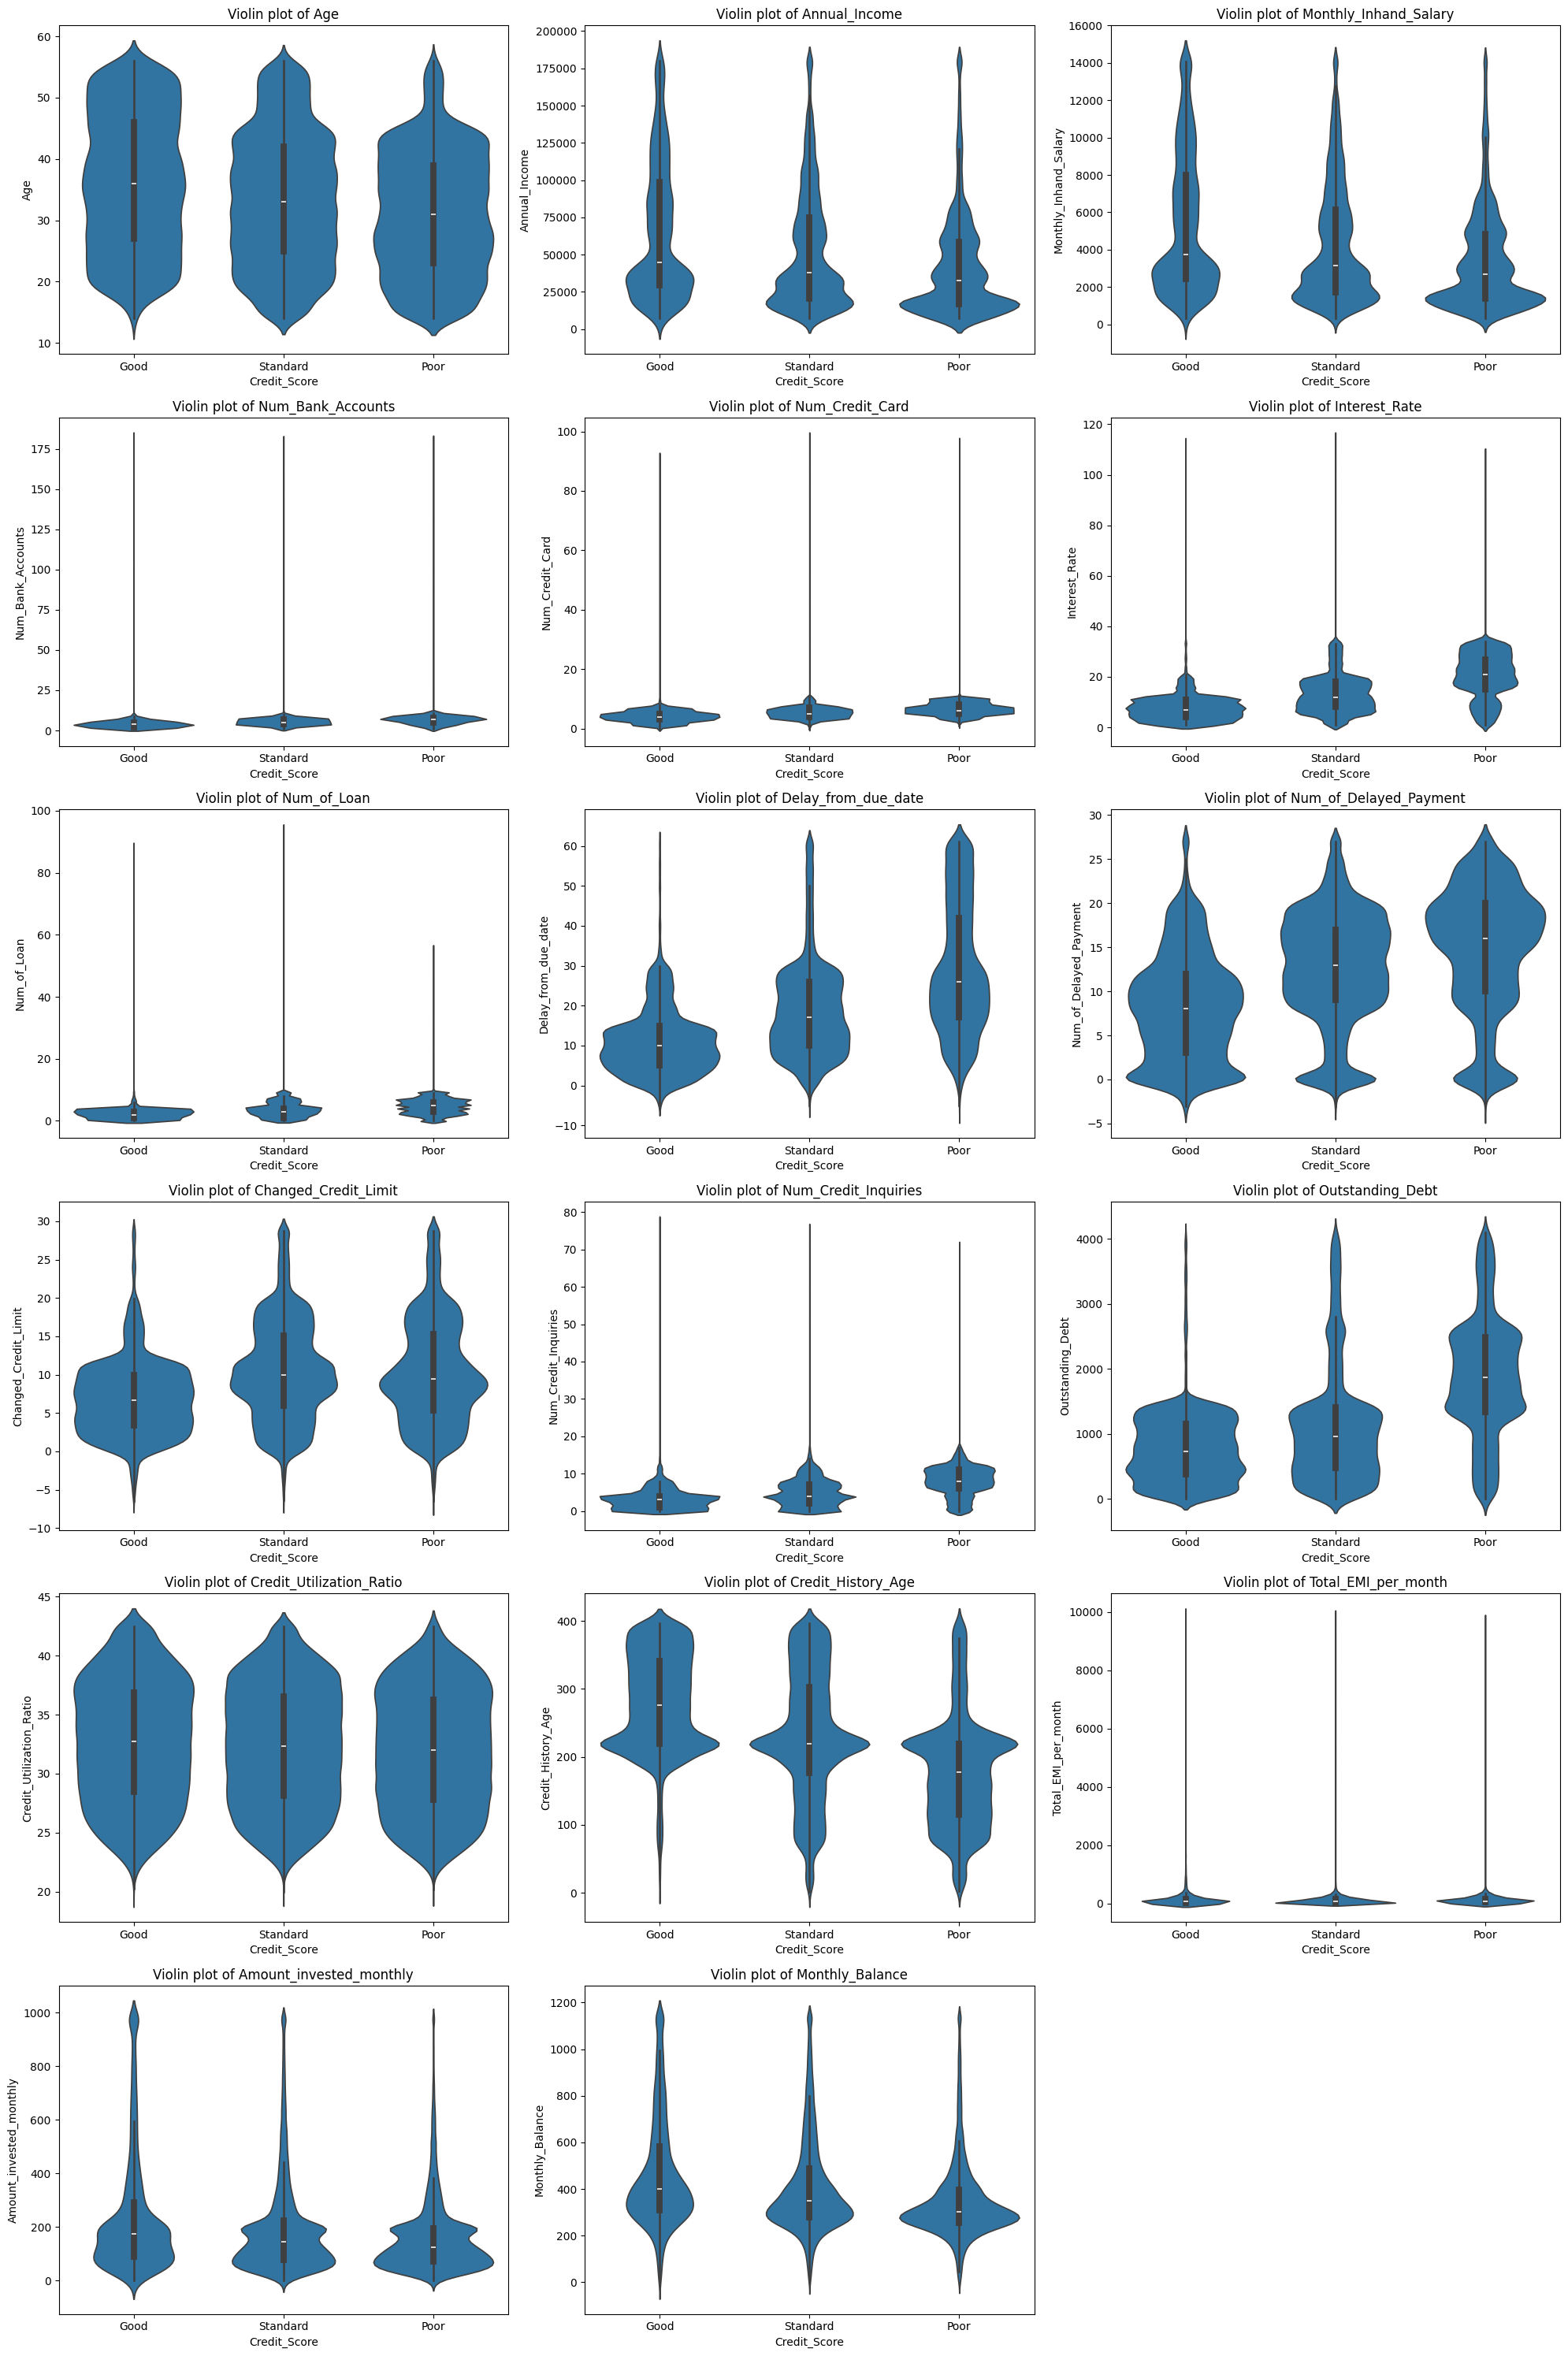

In [34]:
# Select all numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row as needed

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, column in enumerate(numeric_columns):
    sns.violinplot(data=train_df,x="Credit_Score", y=train_df[column], ax=axes[i])
    axes[i].set_title(f"Violin plot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

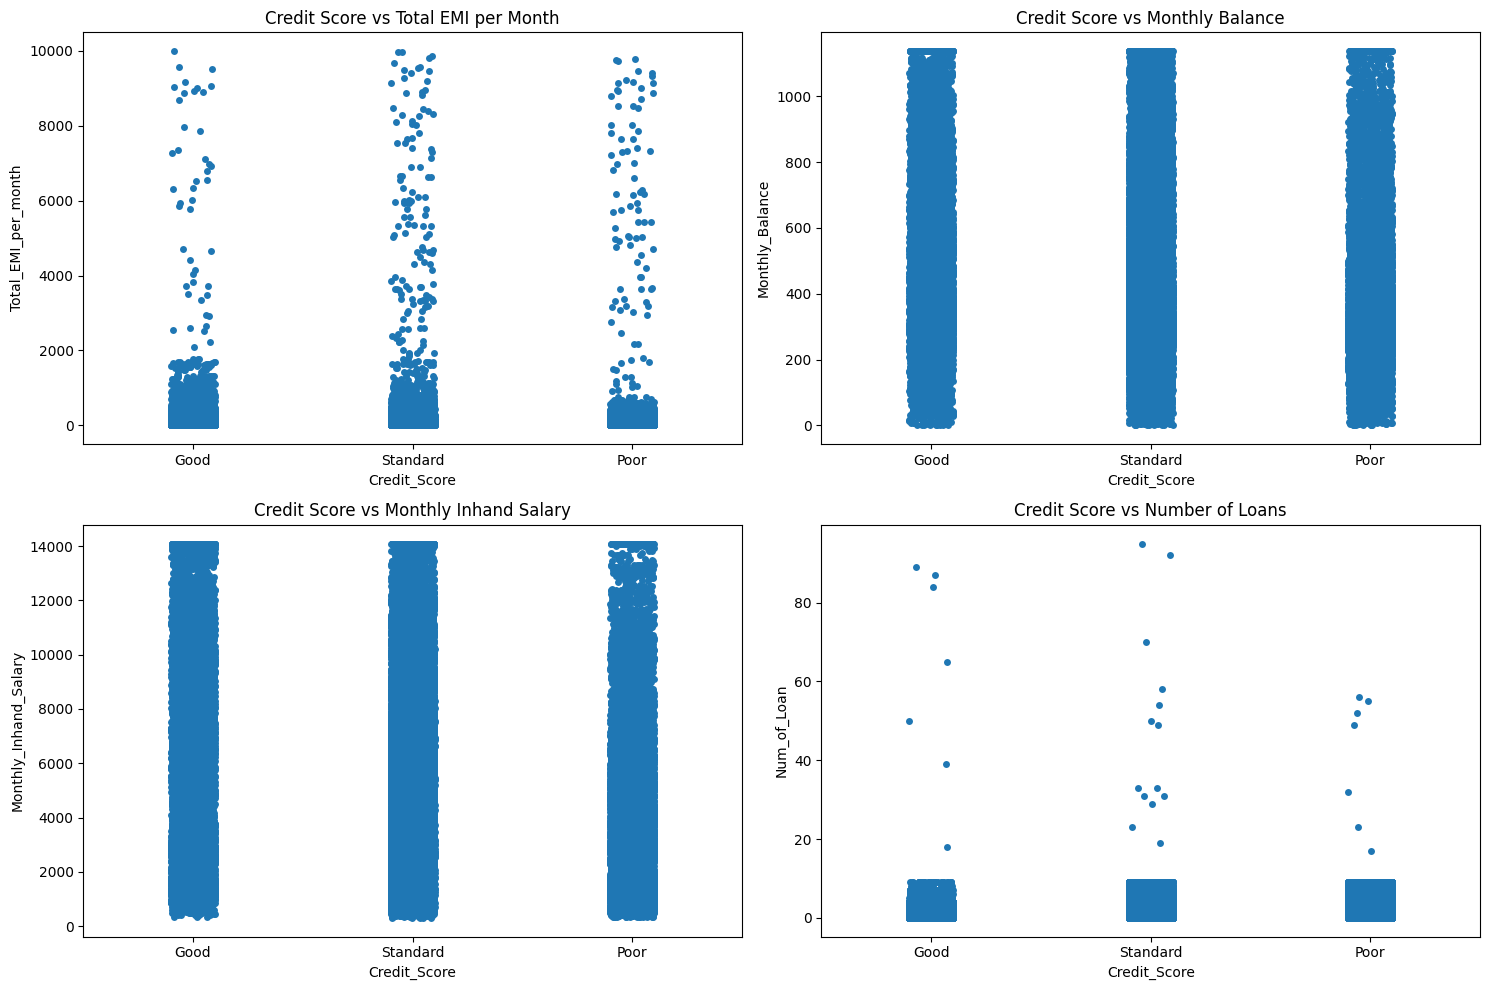

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots arranged in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each sns.stripplot in a separate subplot
sns.stripplot(x="Credit_Score", y="Total_EMI_per_month", data=train_df, ax=axes[0, 0])
axes[0, 0].set_title("Credit Score vs Total EMI per Month")

sns.stripplot(x="Credit_Score", y="Monthly_Balance", data=train_df, ax=axes[0, 1])
axes[0, 1].set_title("Credit Score vs Monthly Balance")

sns.stripplot(x="Credit_Score", y="Monthly_Inhand_Salary", data=train_df, ax=axes[1, 0])
axes[1, 0].set_title("Credit Score vs Monthly Inhand Salary")

sns.stripplot(x="Credit_Score", y="Num_of_Loan", data=train_df, ax=axes[1, 1])
axes[1, 1].set_title("Credit Score vs Number of Loans")

# Adjust the layout
plt.tight_layout()
plt.show()

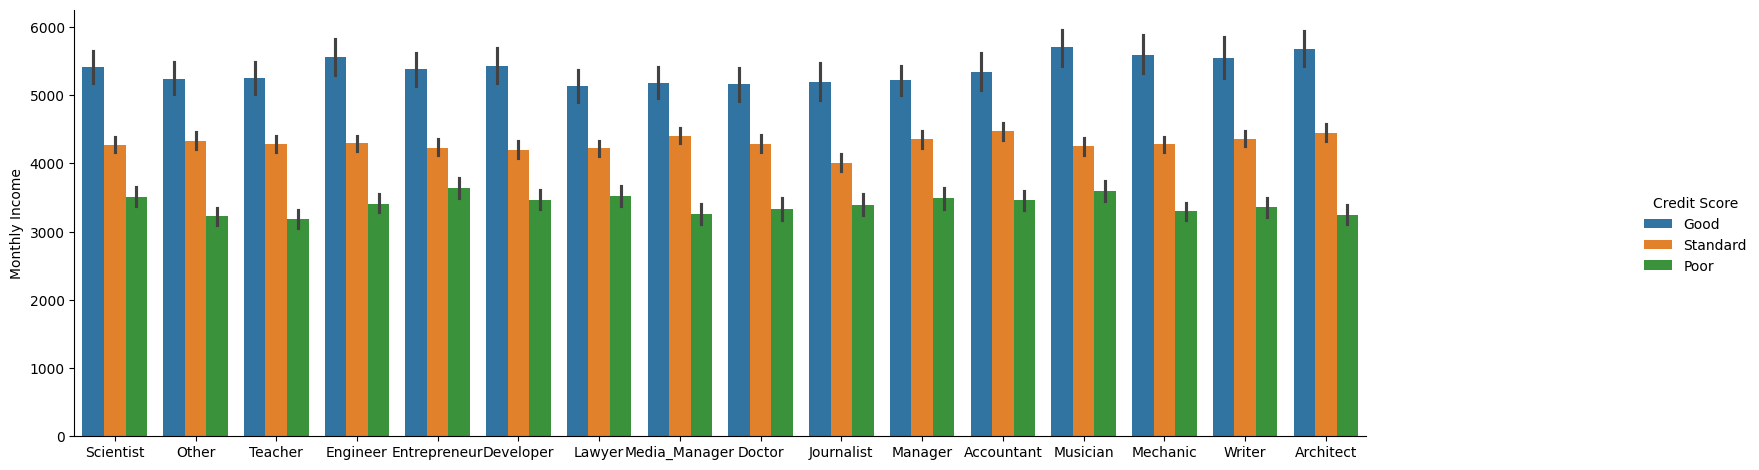

In [36]:
g = sns.catplot(
    data=train_df, kind="bar", x="Occupation", y="Monthly_Inhand_Salary", hue="Credit_Score"
)

g.set_axis_labels("", "Monthly Income")
g.legend.set_title("Credit Score")
plt.gcf().set_size_inches(20, 5)
plt.show()

<Axes: xlabel='Num_Credit_Card', ylabel='Num_Bank_Accounts'>

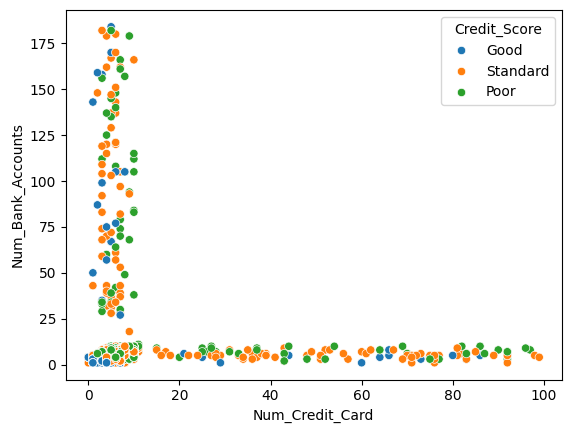

In [37]:
sns.scatterplot(x="Num_Credit_Card", y="Num_Bank_Accounts", data=train_df, hue="Credit_Score")

<Axes: xlabel='Interest_Rate', ylabel='Num_of_Delayed_Payment'>

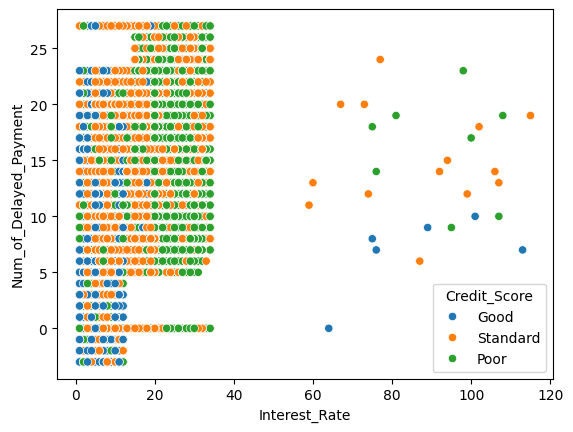

In [38]:
sns.scatterplot(
    x="Interest_Rate", y="Num_of_Delayed_Payment", data=train_df, hue="Credit_Score"
)

Preprocessing

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming train_df is already defined
# Identify all categorical columns
categorical_columns = train_df.select_dtypes(
    include=["object", "category"]
).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column and save as new column
for column in categorical_columns:
    train_df[f"label_{column}"] = label_encoder.fit_transform(train_df[column])
    train_df.drop(columns=[column], inplace=True)

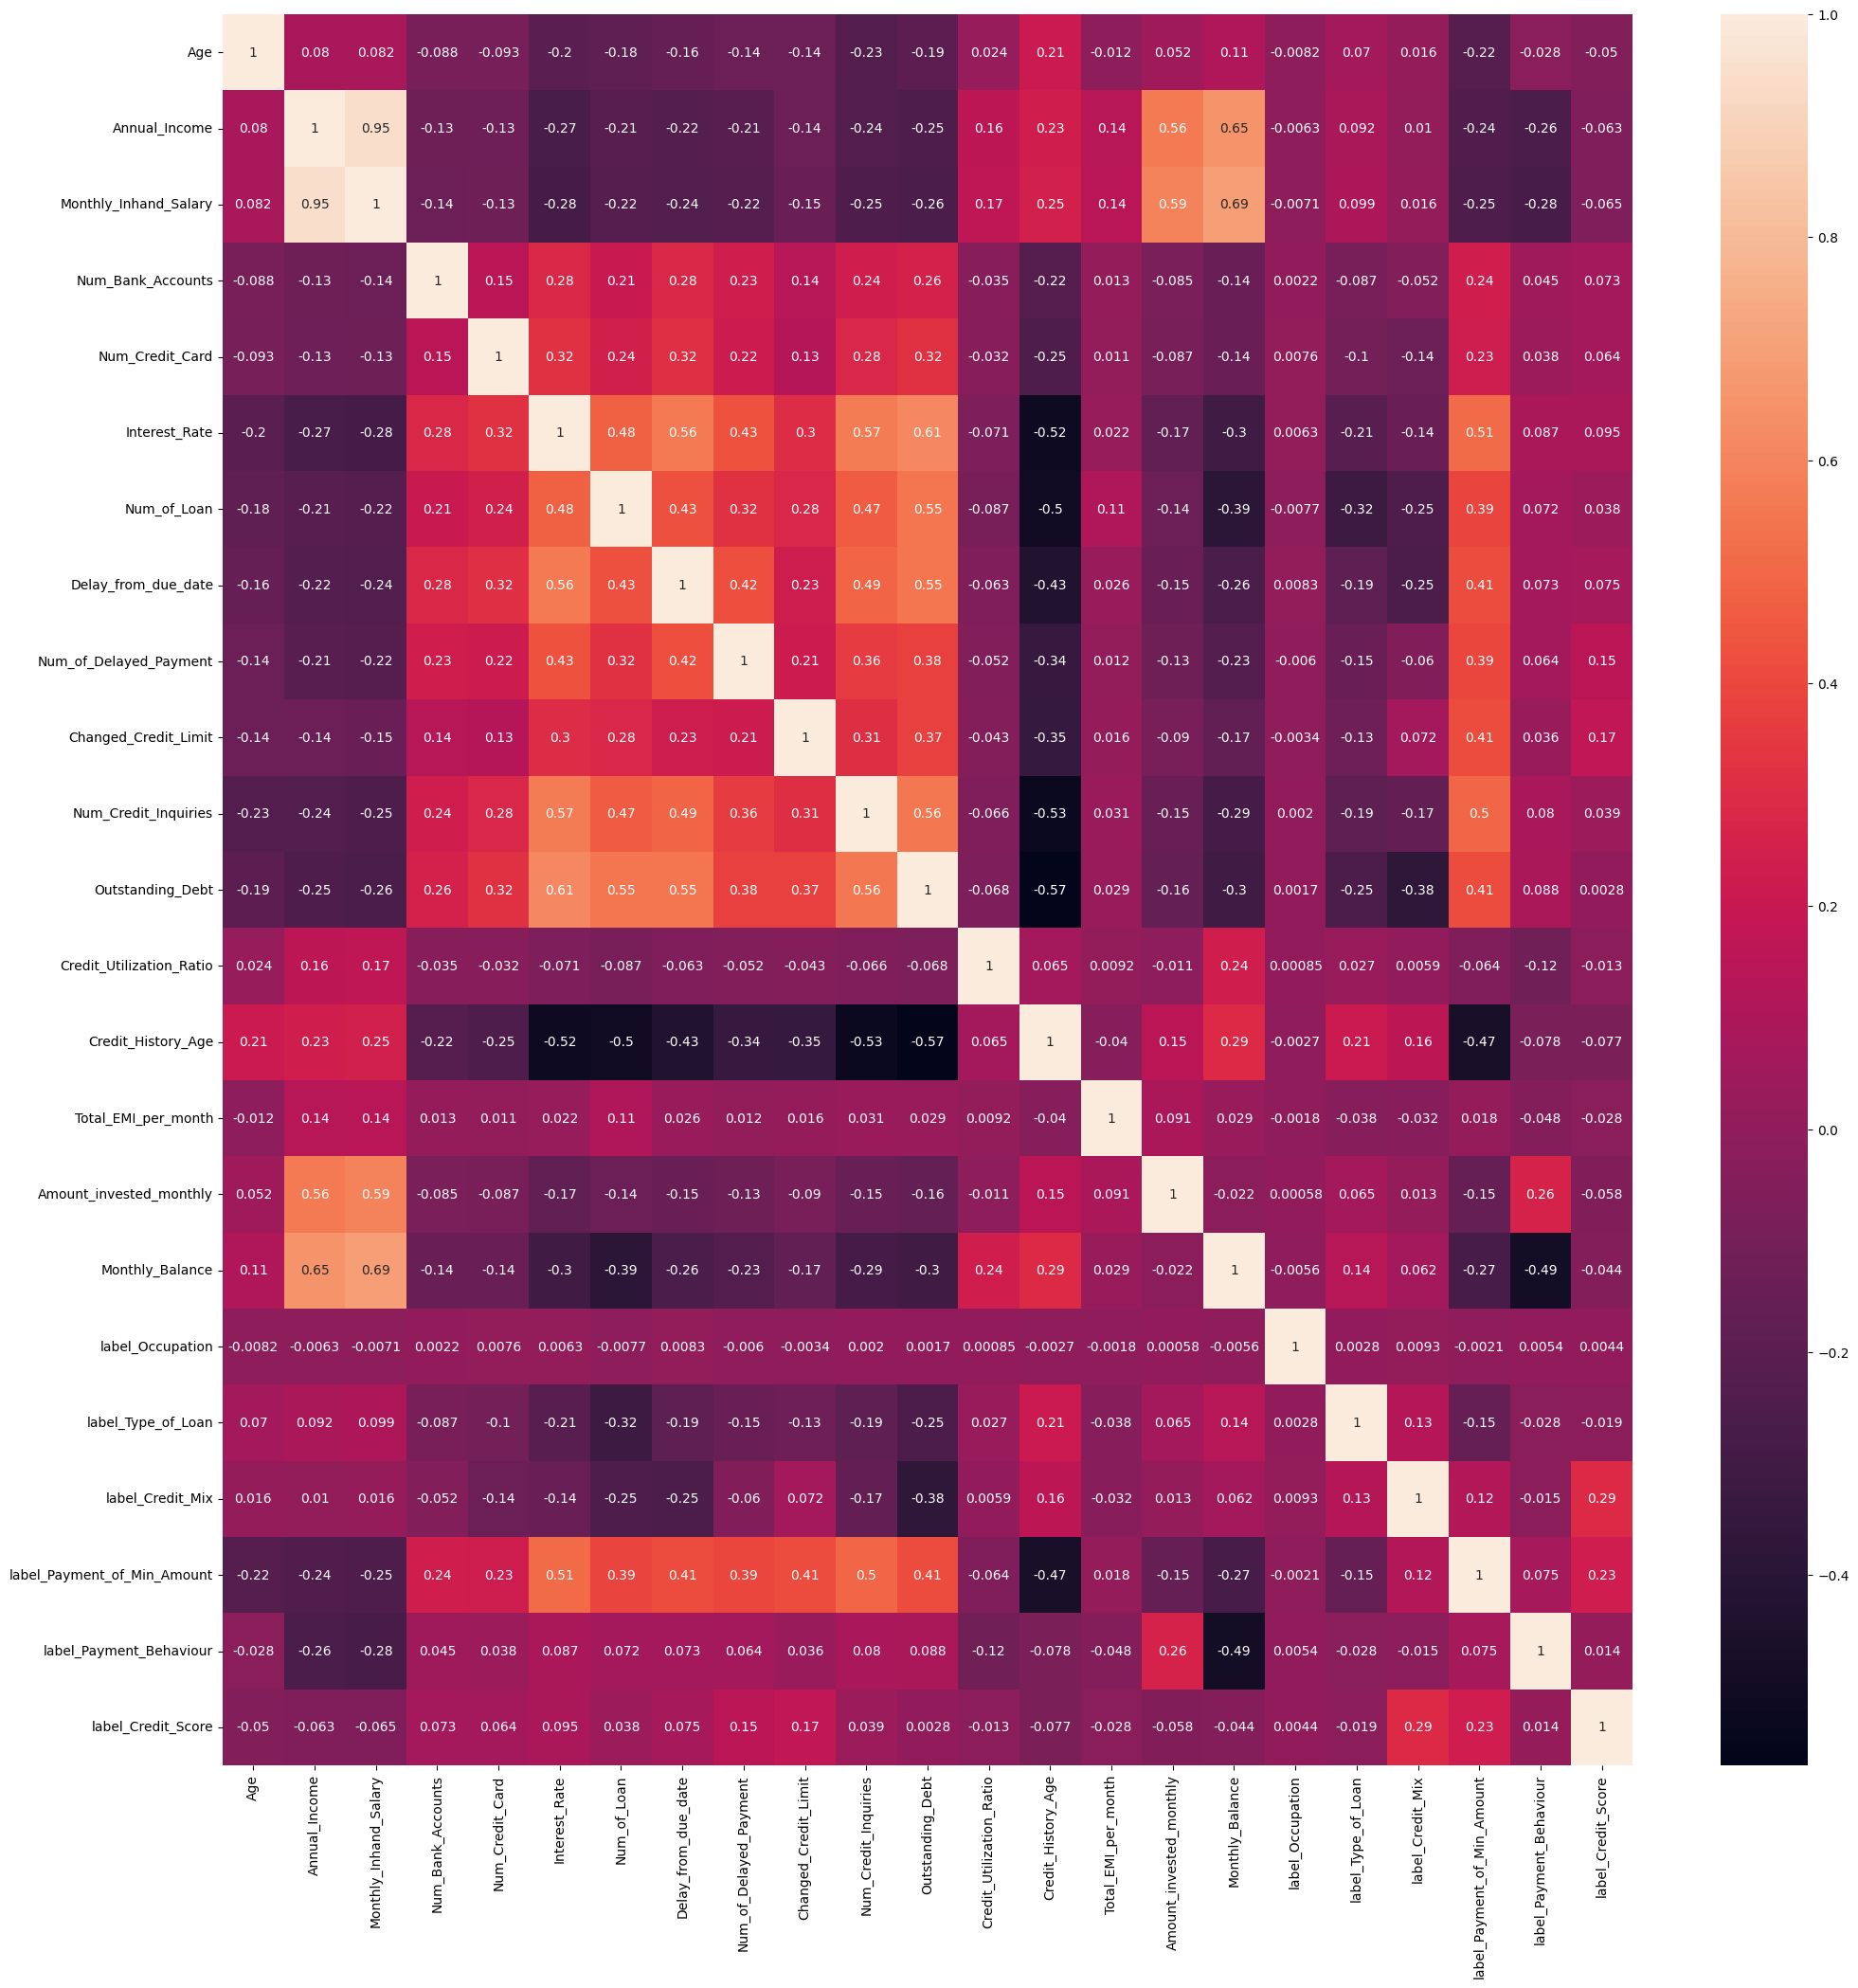

In [40]:
plt.figure(figsize=(24, 24))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

<Axes: >

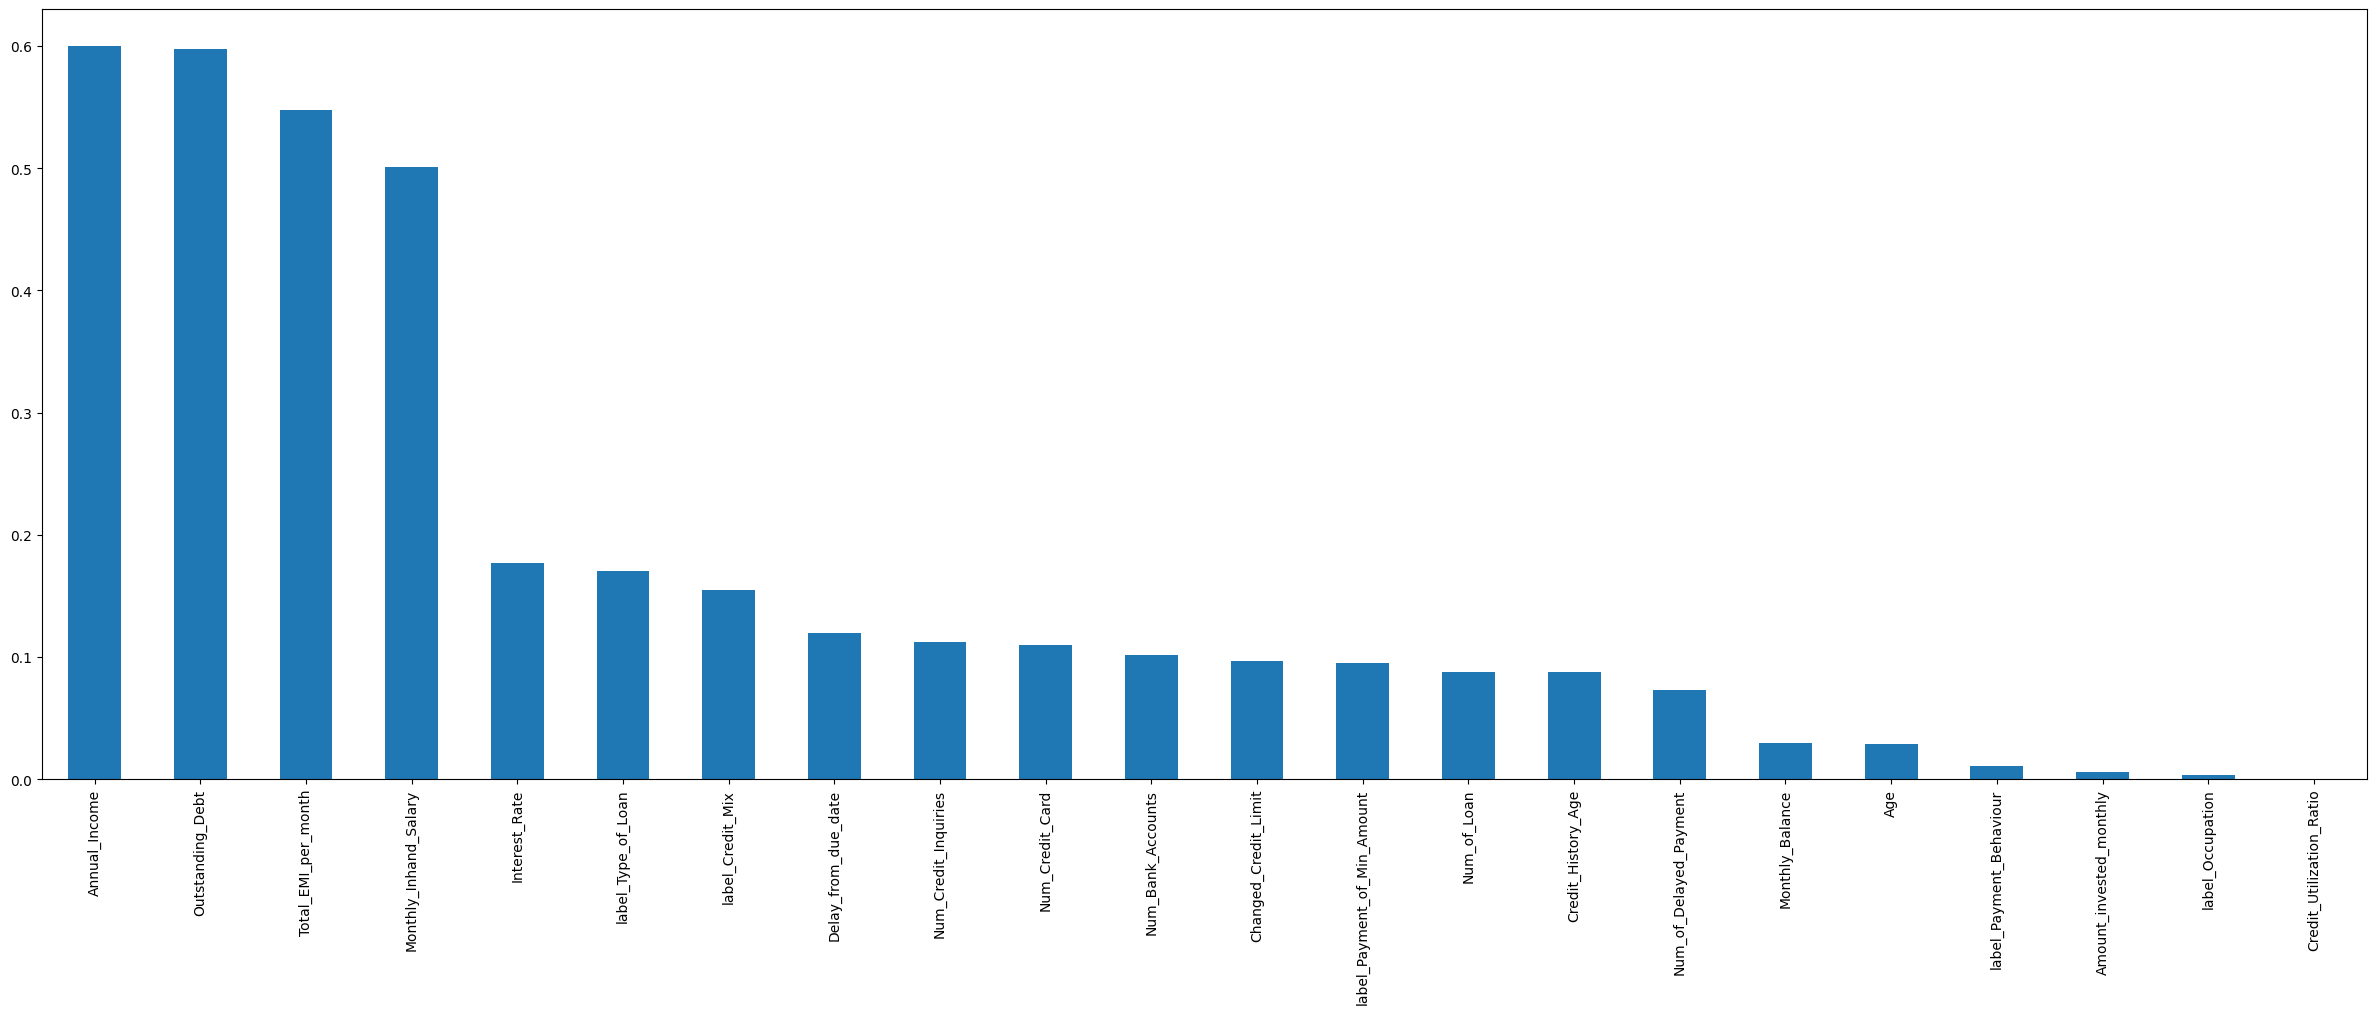

In [41]:
# finding information gain for each feature in data
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(train_df.drop("label_Credit_Score", axis=1), train_df["label_Credit_Score"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_df.drop("label_Credit_Score", axis=1).columns
mutual_info.sort_values(ascending=False)
# plotting information gain for each feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30, 10))

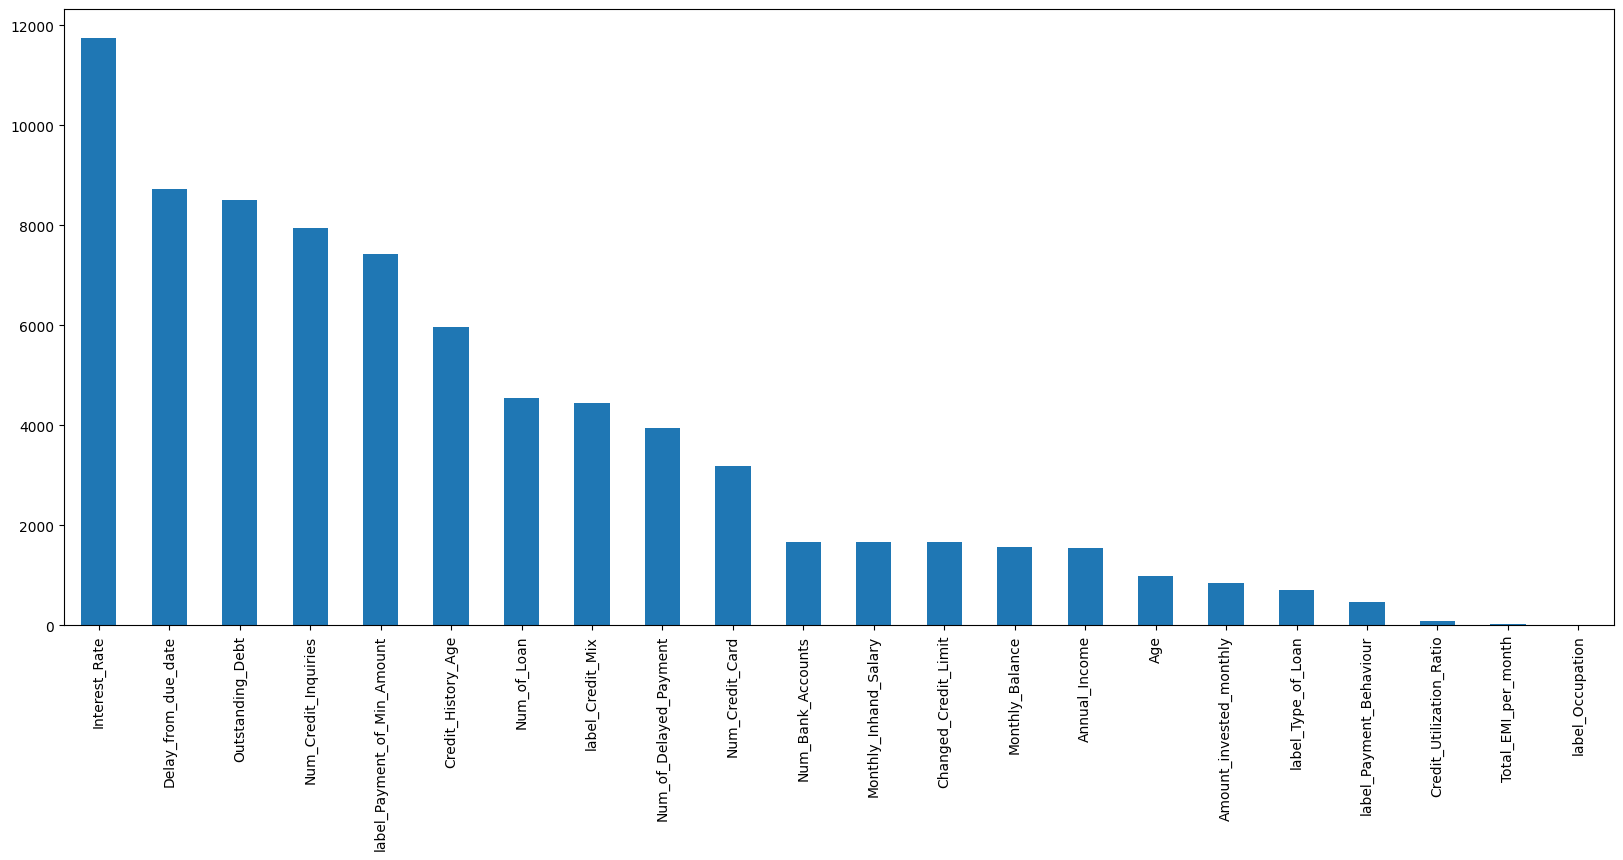

In [42]:
# calculate fisher score for feature selection
from sklearn.feature_selection import f_classif

f_score = f_classif(train_df.iloc[:, :-1], train_df.iloc[:, -1])
f_score = pd.Series(f_score[0])
f_score.index = train_df.iloc[:, :-1].columns
f_score.sort_values(ascending=False)
# plot fisher score
f_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()


In [43]:
train_df=train_df.drop(['label_Occupation','Credit_Utilization_Ratio','label_Payment_Behaviour'],axis=1)

In [44]:
train_df.to_csv("train_df_cleaned.csv", index=False)

Applying models

In [45]:
df = pd.read_csv("train_df_cleaned.csv")

In [46]:
import pandas as pd

In [47]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# # Define the target and features
# X = df.drop(columns=["label_Credit_Score"])
# y = df["label_Credit_Score"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize LazyClassifier
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# # Fit the models
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# # Display the results
# print(models)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("label_Credit_Score", axis=1)
y = df["label_Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.preprocessing import PowerTransformer

scalar = PowerTransformer(method="yeo-johnson", standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [57]:
# logistic regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6547486763840774
              precision    recall  f1-score   support

           0       0.58      0.50      0.53      2605
           1       0.66      0.53      0.59      4402
           2       0.67      0.77      0.72      8292

    accuracy                           0.65     15299
   macro avg       0.64      0.60      0.61     15299
weighted avg       0.65      0.65      0.65     15299



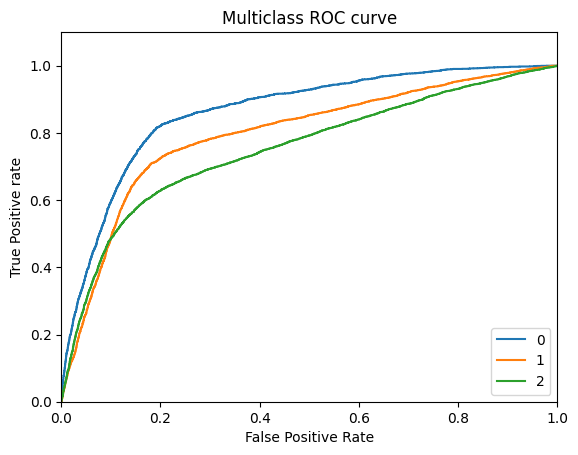

In [58]:
## Reference -> GFG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = {}

roc_cu = LogisticRegression(max_iter=5000)

uniqueee = np.unique(y_test)

roc_cu.fit(X_train, y_train)

binaryii = label_binarize(y_test, classes=uniqueee)

pred_prob = roc_cu.predict_proba(X_test)

y_pred = roc_cu.predict(X_test)
roc_auc = dict()


tpr = {}


for i in range(0, 3):
    fpr[i], tpr[i], thresh = roc_curve(binaryii[:, i], pred_prob[:, i])
    ap = 1
    roc_auc[i] = auc(fpr[i], tpr[i])

    d = 1

    plt.plot(fpr[i], tpr[i], label="%s" % (i))

plt.xlabel("False Positive Rate")
plt.xlim([0, 1])
plt.title("Multiclass ROC curve")
plt.legend(loc="lower right")
plt.ylabel("True Positive rate")
plt.ylim([0, 1.1])

plt.show()

In [59]:
# applying naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6185371592914569
              precision    recall  f1-score   support

           0       0.40      0.79      0.53      2605
           1       0.65      0.68      0.66      4402
           2       0.79      0.53      0.64      8292

    accuracy                           0.62     15299
   macro avg       0.61      0.67      0.61     15299
weighted avg       0.68      0.62      0.63     15299



In [60]:
# applying decision tree with information gain as criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7194587881560887
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      2605
           1       0.72      0.70      0.71      4402
           2       0.78      0.74      0.76      8292

    accuracy                           0.72     15299
   macro avg       0.69      0.71      0.70     15299
weighted avg       0.73      0.72      0.72     15299



In [61]:
# applying decision tree with gini index as criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier(criterion="gini", max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.7229230668671155
              precision    recall  f1-score   support

           0       0.58      0.70      0.63      2605
           1       0.73      0.68      0.70      4402
           2       0.77      0.75      0.76      8292

    accuracy                           0.72     15299
   macro avg       0.69      0.71      0.70     15299
weighted avg       0.73      0.72      0.72     15299



In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# accuracy score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7970455585332374
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2605
           1       0.78      0.81      0.80      4402
           2       0.82      0.81      0.82      8292

    accuracy                           0.80     15299
   macro avg       0.78      0.78      0.78     15299
weighted avg       0.80      0.80      0.80     15299



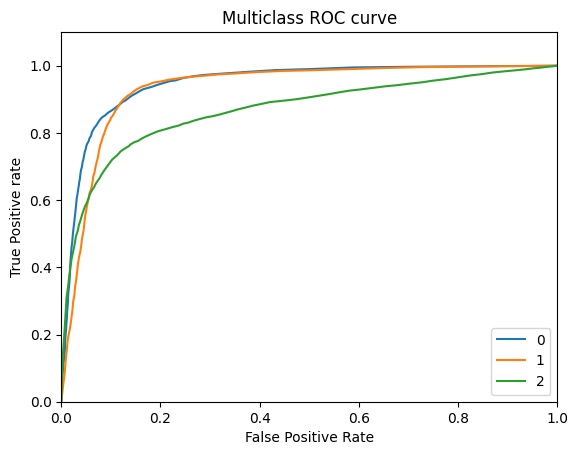

In [63]:
## Reference -> GFG
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = {}


uniqueee = np.unique(y_test)

binaryii = label_binarize(y_test, classes=uniqueee)

pred_prob = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)
roc_auc = dict()


tpr = {}


for i in range(0, 3):
    fpr[i], tpr[i], thresh = roc_curve(binaryii[:, i], pred_prob[:, i])
    ap = 1
    roc_auc[i] = auc(fpr[i], tpr[i])

    d = 1

    plt.plot(fpr[i], tpr[i], label="%s" % (i))

plt.xlabel("False Positive Rate")
plt.xlim([0, 1])
plt.title("Multiclass ROC curve")
plt.legend(loc="lower right")
plt.ylabel("True Positive rate")
plt.ylim([0, 1.1])

plt.show()

# 0 - good
# 1 - poor
# 2 - standard